In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
import sys
import csv
import math
from operator import itemgetter
import time

from sklearn.svm import SVC, SVR
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.externals import joblib
from sklearn.feature_selection import RFE, VarianceThreshold, SelectFromModel
from sklearn.feature_selection import SelectKBest, mutual_info_regression, mutual_info_classif, chi2
from sklearn import metrics
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.preprocessing import KBinsDiscretizer, scale

In [6]:
data = pd.read_csv('ivy.csv')
data.head()

,DepressionScore,AGE,US_Army)DMQMILIZ,BornInUS,Citizenship(DMDCITZN),EduLevelAdults(DMDEDUC2),MaritalStatus(DMDMARTL),(Eng/Span(SIALANG),#PPLinHousehold(DMDHHSIZ),#Kinds<=5yrs(DMDHHSZA),...,HowOftenDrankMilk,Race(RIDRETH3)_Asian,Race(RIDRETH3)_Black,Race(RIDRETH3)_MexicanAmerican,Race(RIDRETH3)_Other&MultiRacial,Race(RIDRETH3)_OtherHispanic,Race(RIDRETH3)_White,log_vitaminA,female,male
0,1,69,1,1,1,3,0,1,3,0,...,8,0,1,0,0,0,0,4.70,0,1
1,2,54,0,1,1,3,1,1,4,0,...,9,0,0,0,0,0,1,7.31,0,1
2,0,72,1,1,1,4,1,1,2,0,...,9,0,0,0,0,0,1,6.48,0,1
3,9,73,0,1,1,5,1,1,2,0,...,9,0,0,0,0,0,1,6.76,1,0
4,19,56,1,1,1,4,0,1,1,0,...,9,0,0,1,0,0,0,5.87,0,1


In [7]:
train = data.iloc[:,1:]
train.head()

,AGE,US_Army)DMQMILIZ,BornInUS,Citizenship(DMDCITZN),EduLevelAdults(DMDEDUC2),MaritalStatus(DMDMARTL),(Eng/Span(SIALANG),#PPLinHousehold(DMDHHSIZ),#Kinds<=5yrs(DMDHHSZA),#ofKinds6-17yrs(DMDHHSZB),...,HowOftenDrankMilk,Race(RIDRETH3)_Asian,Race(RIDRETH3)_Black,Race(RIDRETH3)_MexicanAmerican,Race(RIDRETH3)_Other&MultiRacial,Race(RIDRETH3)_OtherHispanic,Race(RIDRETH3)_White,log_vitaminA,female,male
0,69,1,1,1,3,0,1,3,0,0,...,8,0,1,0,0,0,0,4.70,0,1
1,54,0,1,1,3,1,1,4,0,2,...,9,0,0,0,0,0,1,7.31,0,1
2,72,1,1,1,4,1,1,2,0,0,...,9,0,0,0,0,0,1,6.48,0,1
3,73,0,1,1,5,1,1,2,0,0,...,9,0,0,0,0,0,1,6.76,1,0
4,56,1,1,1,4,0,1,1,0,0,...,9,0,0,1,0,0,0,5.87,0,1


In [27]:
cor =data.corr()

In [147]:

cor_target = abs(cor['DepressionScore'])

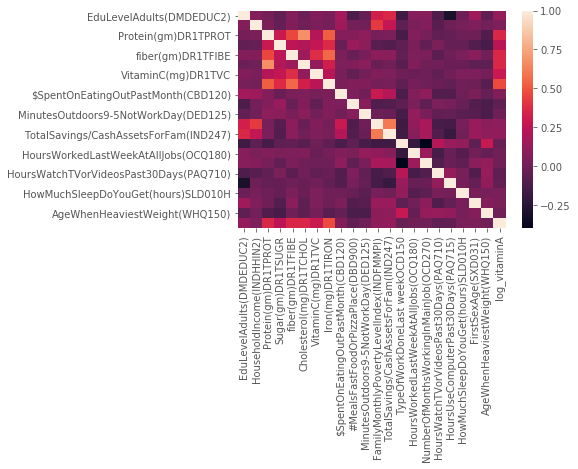

In [163]:
sns.heatmap(cor)

In [148]:
relevant_features = cor_target[cor_target>0.05]
len(relevant_features)

31

In [84]:
relevant_features

DepressionScore                             1.000000
EduLevelAdults(DMDEDUC2)                    0.141944
MaritalStatus(DMDMARTL)                     0.112501
HouseholdIncome(INDHHIN2)                   0.053817
Energy(kcal)DR1TKCAL                        0.050546
Protein(gm)DR1TPROT                         0.076606
Sugar(gm)DR1TSUGR                           0.052820
fiber(gm)DR1TFIBE                           0.067884
Cholesterol(mg)DR1TCHOL                     0.065600
VitaminC(mg)DR1TVC                          0.052029
 Calcium(mg)DR1TCALC                        0.078203
Iron(mg)DR1TIRON                            0.064209
Sodium(mg)DR1TSODI                          0.102265
FishEatenPast30Days1YesDRD360               0.050983
$SpentOnEatingOutPastMonth(CBD120)          0.070609
#MealsFastFoodOrPizzaPlace(DBD900)          0.058417
MinutesOutdoors9-5NotWorkDay(DED125)        0.053559
FamilyMonthlyPovertyLevelIndex(INDFMMPI)    0.139614
TotalSavings/CashAssetsForFam(IND247)       0.

In [27]:
#data.info()

In [153]:
target = data.DepressionScore

In [156]:
target.to_csv('target.csv', sep = ',', encoding = 'utf-8')

In [157]:
subset.to_csv('subset.csv', sep = ',', encoding = 'utf-8')

In [155]:
subset.insert(0, 'target')

TypeError: insert() missing 1 required positional argument: 'value'

In [17]:
data_np = np.array(train)
data_np.shape

(6065, 60)

In [18]:
target_np = np.array(target)
target_np.shape

(6065,)

In [130]:
file1 = csv.reader(open('ivy.csv'), quotechar = '"')
header_new = next(file1)
#header_new

In [23]:
# low variance filter Removes any feature with less than 20% variance
sel = VarianceThreshold(threshold=0.5) 
fit_mod=sel.fit(data_np)
fitted=sel.transform(data_np)
sel_idx=fit_mod.get_support()

#get lists of selected and non-selected features
temp=[]
temp_idx=[]
temp_del=[]
for i in range(len(data_np[0])):
    if sel_idx[i]==1:
        temp.append(header_new[i+1])
        temp_idx.append(i)
    else:
        temp_del.append(i)
print('Selected', temp)
print('Features (total/selected):', len(data_np[0]), len(temp))
print('\n')

Selected ['AGE', 'EduLevelAdults(DMDEDUC2)', '#PPLinHousehold(DMDHHSIZ)', '#ofKinds6-17yrs(DMDHHSZB)', '#ofAdults>=60yrs(DMDHHSZE)', 'HouseholdIncome(INDHHIN2)', 'Protein(gm)DR1TPROT', 'Carbs(gm)DR1TCARB', 'Sugar(gm)DR1TSUGR', 'fiber(gm)DR1TFIBE', ' TotalFat(gm)DR1TTFAT', 'Cholesterol(mg)DR1TCHOL', 'VitaminE(mg)DR1TATOC', 'VitaminC(mg)DR1TVC', 'VitaminD(D2 + D3)(mcg)DR1TVD', 'Iron(mg)DR1TIRON', 'Caffeine(mg)DR1TCAFF', 'TotalCholesterol( mmol/L)LBDTCSI', 'Avg #alcoholicDrinks/dayPast12mos(ALQ130)', '$spentAtSupermarket/grocery store(CBD070)', '$SpentOnNonfoodItems(CBD090)', '$SpentOnEatingOutPastMonth(CBD120)', '$SpentCarryout/deliveredFoodsPastMonth(CBD130)', 'Past30dayMilkProductConsumption(DBQ197)', '#MealsNotHomePrepared(DBD895)', '#MealsFastFoodOrPizzaPlace(DBD900)', 'MinutesOutdoors9-5NotWorkDay(DED125)', 'FamilyMonthlyPovertyLevelIndex(INDFMMPI)', 'TotalSavings/CashAssetsForFam(IND247)', 'TypeOfWorkDoneLast weekOCD150', 'HoursWorkedLastWeekAtAllJobs(OCQ180)', 'DescriptionOfJob/wo

In [24]:
len(temp)

42

In [143]:
subset.corr()

,EduLevelAdults(DMDEDUC2),HouseholdIncome(INDHHIN2),Protein(gm)DR1TPROT,Sugar(gm)DR1TSUGR,fiber(gm)DR1TFIBE,Cholesterol(mg)DR1TCHOL,VitaminC(mg)DR1TVC,Iron(mg)DR1TIRON,$SpentOnEatingOutPastMonth(CBD120),#MealsFastFoodOrPizzaPlace(DBD900),MinutesOutdoors9-5NotWorkDay(DED125),TypeOfWorkDoneLast weekOCD150,HoursWorkedLastWeekAtAllJobs(OCQ180),NumberOfMonthsWorkingInMainJob(OCD270),HoursWatchTVorVideosPast30Days(PAQ710),HoursUseComputerPast30Days(PAQ715),HowMuchSleepDoYouGet(hours)SLD010H,FirstSexAge(SXD031),AgeWhenHeaviestWeight(WHQ150),log_vitaminA
EduLevelAdults(DMDEDUC2),1.000000,0.062486,0.018757,-0.044610,0.063213,-0.012483,0.059365,0.030637,0.170035,-0.118193,-0.034256,-0.165894,0.072727,0.076104,-0.109992,-0.297329,-0.013843,0.154098,-0.049804,0.122978
HouseholdIncome(INDHHIN2),0.062486,1.000000,0.039624,-0.029663,0.055070,0.008429,0.036107,0.011582,0.148862,0.013881,0.003896,-0.056403,0.039843,0.066292,-0.079109,-0.005517,0.023083,0.050755,0.015106,0.045651
Protein(gm)DR1TPROT,0.018757,0.039624,1.000000,0.293518,0.459543,0.674801,0.225956,0.528471,0.063524,0.068065,0.099472,-0.131688,0.062962,0.023411,-0.048475,-0.036699,-0.003930,-0.010502,-0.108417,0.365248
Sugar(gm)DR1TSUGR,-0.044610,-0.029663,0.293518,1.000000,0.249785,0.214863,0.269316,0.369685,-0.017318,0.134816,0.088601,-0.058739,0.040843,-0.043396,0.042787,-0.032052,-0.032440,-0.099694,-0.134925,0.242256
fiber(gm)DR1TFIBE,0.063213,0.055070,0.459543,0.249785,1.000000,0.143482,0.379288,0.553270,0.040319,-0.024849,0.032819,-0.048057,0.044168,0.035609,-0.064824,-0.008567,0.034741,0.083028,0.006389,0.362829
Cholesterol(mg)DR1TCHOL,-0.012483,0.008429,0.674801,0.214863,0.143482,1.000000,0.111365,0.327383,0.043891,0.055866,0.087543,-0.077672,0.059101,0.009936,0.000239,-0.019485,-0.017377,-0.054655,-0.059249,0.358828
VitaminC(mg)DR1TVC,0.059365,0.036107,0.225956,0.269316,0.379288,0.111365,1.000000,0.235281,0.022674,-0.044863,0.014732,-0.006414,-0.017629,-0.003454,-0.048657,0.006389,0.047039,0.046201,0.018358,0.292338
Iron(mg)DR1TIRON,0.030637,0.011582,0.528471,0.369685,0.553270,0.327383,0.235281,1.000000,0.039216,0.052670,0.058017,-0.050316,0.018391,-0.001161,-0.017976,-0.047977,0.008103,-0.010626,-0.077028,0.470398
$SpentOnEatingOutPastMonth(CBD120),0.170035,0.148862,0.063524,-0.017318,0.040319,0.043891,0.022674,0.039216,1.000000,0.045238,0.008233,-0.122442,0.064030,0.101378,-0.094033,-0.095380,-0.005796,0.042297,-0.034415,0.056513
#MealsFastFoodOrPizzaPlace(DBD900),-0.118193,0.013881,0.068065,0.134816,-0.024849,0.055866,-0.044863,0.052670,0.045238,1.000000,0.077782,-0.059855,0.038539,-0.049096,0.048187,0.025133,-0.025548,-0.093434,-0.123664,-0.052495


In [144]:
len(relevant_features)

31

In [30]:
def intersection(lst1, lst2): 
    lst3 = [value for value in lst1 if value in lst2] 
    return lst3 

features = intersection(temp, relevant_features)
features

['EduLevelAdults(DMDEDUC2)',
 'HouseholdIncome(INDHHIN2)',
 'Protein(gm)DR1TPROT',
 'Sugar(gm)DR1TSUGR',
 'fiber(gm)DR1TFIBE',
 'Cholesterol(mg)DR1TCHOL',
 'VitaminC(mg)DR1TVC',
 'Iron(mg)DR1TIRON',
 '$SpentOnEatingOutPastMonth(CBD120)',
 '#MealsFastFoodOrPizzaPlace(DBD900)',
 'MinutesOutdoors9-5NotWorkDay(DED125)',
 'FamilyMonthlyPovertyLevelIndex(INDFMMPI)',
 'TotalSavings/CashAssetsForFam(IND247)',
 'TypeOfWorkDoneLast weekOCD150',
 'HoursWorkedLastWeekAtAllJobs(OCQ180)',
 'NumberOfMonthsWorkingInMainJob(OCD270)',
 'HoursWatchTVorVideosPast30Days(PAQ710)',
 'HoursUseComputerPast30Days(PAQ715)',
 'HowMuchSleepDoYouGet(hours)SLD010H',
 'FirstSexAge(SXD031)',
 'AgeWhenHeaviestWeight(WHQ150)',
 'log_vitaminA']

In [31]:
len(features)

22

In [32]:
multual_select = SelectKBest(mutual_info_regression, k =40)
fit_multual = multual_select.fit(data_np, target_np)
print('Univariate Feature Selection - Multual Info: ')

sel_idx_multual = fit_multual.get_support()

temp = []
scores = fit_multual.scores_
for i in range(1, len(header_new)):
      temp.append([header_new[i], float(scores[i-1])])
print('Ranked Features')
      
temp_sort=sorted(temp, key=itemgetter(1), reverse= True)
for i in range(len(temp_sort)): 
      print(i, temp_sort[i][0], ':', temp_sort[i][1])
print('\n')


#get lists of selected and non-selected features
tempSele=[]
tempSele_idx=[]
tempSele_del=[]
for i in range(len(data_np[0])):
    if sel_idx_multual[i]==1:
        tempSele.append(header_new[i+1])
        tempSele_idx.append(i)
    else:
        tempSele_del.append(i)
print('Selected', tempSele)
print('Features (total/selected):', len(data_np[0]), len(tempSele))
print('\n')

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


Univariate Feature Selection - Multual Info: 
Ranked Features
0 FirstSexAge(SXD031) : 0.0667080982922057
1 AGE : 0.06430426164100123
2 log_vitaminA : 0.059633750446830724
3 Sugar(gm)DR1TSUGR : 0.05787394875664642
4 Caffeine(mg)DR1TCAFF : 0.05709130216710889
5 fiber(gm)DR1TFIBE : 0.053744279977665066
6 Energy(kcal)DR1TKCAL : 0.05229010665884726
7 Cholesterol(mg)DR1TCHOL : 0.051347893574149595
8 VitaminD(D2 + D3)(mcg)DR1TVD : 0.048964750103583476
9  TotalFat(gm)DR1TTFAT : 0.04549118938508112
10 Carbs(gm)DR1TCARB : 0.04437525055621361
11 Sodium(mg)DR1TSODI : 0.04396272823337455
12 Avg #alcoholicDrinks/dayPast12mos(ALQ130) : 0.042696784920557285
13  Calcium(mg)DR1TCALC : 0.04138179602495029
14 AgeWhenHeaviestWeight(WHQ150) : 0.04136126769117521
15 Iron(mg)DR1TIRON : 0.04006689766810201
16 Protein(gm)DR1TPROT : 0.039444990873753305
17 VitaminC(mg)DR1TVC : 0.03542763093791024
18 HouseholdIncome(INDHHIN2) : 0.03517011926051694
19 NumberOfMonthsWorkingInMainJob(OCD270) : 0.03393738921007028
20

In [25]:
def intersection(intersect1, multual_info): 
    new_list = [value for value in intersect1 if value in multual_info] 
    return new_list

new_features = intersection(features, tempSele)
len(new_features)

19

In [26]:
new_features

['EduLevelAdults(DMDEDUC2)',
 'HouseholdIncome(INDHHIN2)',
 'Protein(gm)DR1TPROT',
 'Sugar(gm)DR1TSUGR',
 'fiber(gm)DR1TFIBE',
 'Cholesterol(mg)DR1TCHOL',
 'VitaminC(mg)DR1TVC',
 'Iron(mg)DR1TIRON',
 'FamilyMonthlyPovertyLevelIndex(INDFMMPI)',
 'TotalSavings/CashAssetsForFam(IND247)',
 'TypeOfWorkDoneLast weekOCD150',
 'HoursWorkedLastWeekAtAllJobs(OCQ180)',
 'NumberOfMonthsWorkingInMainJob(OCD270)',
 'HoursWatchTVorVideosPast30Days(PAQ710)',
 'HoursUseComputerPast30Days(PAQ715)',
 'HowMuchSleepDoYouGet(hours)SLD010H',
 'FirstSexAge(SXD031)',
 'AgeWhenHeaviestWeight(WHQ150)',
 'log_vitaminA']

In [74]:
def Diff(li1, li2): 
    return (list(set(li1) - set(li2))) 
   
print(Diff(header, features)) 
print(len(Diff(header, features)))

['male', 'Carbs(gm)DR1TCARB', 'HowOftenDrankMilk', 'Race(RIDRETH3)_MexicanAmerican', 'female', 'Race(RIDRETH3)_OtherHispanic', 'Avg #alcoholicDrinks/dayPast12mos(ALQ130)', 'Race(RIDRETH3)_White', '#Kinds<=5yrs(DMDHHSZA)', '#ofAdults>=60yrs(DMDHHSZE)', '#MealsNotHomePrepared(DBD895)', 'Race(RIDRETH3)_Asian', '#PPLinHousehold(DMDHHSIZ)', '$SpentOnNonfoodItems(CBD090)', 'DescriptionOfJob/workSituation(OCQ260)', 'AGE', 'US_Army)DMQMILIZ', 'Caffeine(mg)DR1TCAFF', 'Race(RIDRETH3)_Other&MultiRacial', 'VitaminD(D2 + D3)(mcg)DR1TVD', 'CurrentSelfReportedWeight(pounds)WHD020', 'Energy(kcal)DR1TKCAL', ' TotalFat(gm)DR1TTFAT', 'Race(RIDRETH3)_Black', '$SpentCarryout/deliveredFoodsPastMonth(CBD130)', 'Past30dayMilkProductConsumption(DBQ197)', 'FishEatenPast30Days1YesDRD360', '$spentAtSupermarket/grocery store(CBD070)', 'TotalCholesterol( mmol/L)LBDTCSI', 'Citizenship(DMDCITZN)', '#ofKinds6-17yrs(DMDHHSZB)', 'DurationOfLongestJob(months)OCD395', ' Calcium(mg)DR1TCALC', 'Sodium(mg)DR1TSODI', 'Marital

In [28]:
len(features)

22

In [28]:
from sklearn.feature_selection import mutual_info_regression

In [33]:
subset = train[['EduLevelAdults(DMDEDUC2)',
 'HouseholdIncome(INDHHIN2)',
 'Protein(gm)DR1TPROT',
 'Sugar(gm)DR1TSUGR',
 'fiber(gm)DR1TFIBE',
 'Cholesterol(mg)DR1TCHOL',
 'VitaminC(mg)DR1TVC',
 'Iron(mg)DR1TIRON',
 '$SpentOnEatingOutPastMonth(CBD120)',
 '#MealsFastFoodOrPizzaPlace(DBD900)',
 'MinutesOutdoors9-5NotWorkDay(DED125)',
 'TypeOfWorkDoneLast weekOCD150',
 'HoursWorkedLastWeekAtAllJobs(OCQ180)',
 'NumberOfMonthsWorkingInMainJob(OCD270)',
 'HoursWatchTVorVideosPast30Days(PAQ710)',
 'HoursUseComputerPast30Days(PAQ715)',
 'HowMuchSleepDoYouGet(hours)SLD010H',
 'FirstSexAge(SXD031)',
 'AgeWhenHeaviestWeight(WHQ150)',
 'log_vitaminA']]

In [34]:
subset_list= ['EduLevelAdults(DMDEDUC2)',
 'HouseholdIncome(INDHHIN2)',
 'Protein(gm)DR1TPROT',
 'Sugar(gm)DR1TSUGR',
 'fiber(gm)DR1TFIBE',
 'Cholesterol(mg)DR1TCHOL',
 'VitaminC(mg)DR1TVC',
 'Iron(mg)DR1TIRON',
 '$SpentOnEatingOutPastMonth(CBD120)',
 '#MealsFastFoodOrPizzaPlace(DBD900)',
 'MinutesOutdoors9-5NotWorkDay(DED125)',
 'TypeOfWorkDoneLast weekOCD150',
 'HoursWorkedLastWeekAtAllJobs(OCQ180)',
 'NumberOfMonthsWorkingInMainJob(OCD270)',
 'HoursWatchTVorVideosPast30Days(PAQ710)',
 'HoursUseComputerPast30Days(PAQ715)',
 'HowMuchSleepDoYouGet(hours)SLD010H',
 'FirstSexAge(SXD031)',
 'AgeWhenHeaviestWeight(WHQ150)',
 'log_vitaminA']

In [35]:
len(subset_list)

20

In [170]:
subset.head()

,EduLevelAdults(DMDEDUC2),HouseholdIncome(INDHHIN2),Protein(gm)DR1TPROT,Sugar(gm)DR1TSUGR,fiber(gm)DR1TFIBE,Cholesterol(mg)DR1TCHOL,VitaminC(mg)DR1TVC,Iron(mg)DR1TIRON,$SpentOnEatingOutPastMonth(CBD120),#MealsFastFoodOrPizzaPlace(DBD900),MinutesOutdoors9-5NotWorkDay(DED125),TypeOfWorkDoneLast weekOCD150,HoursWorkedLastWeekAtAllJobs(OCQ180),NumberOfMonthsWorkingInMainJob(OCD270),HoursWatchTVorVideosPast30Days(PAQ710),HoursUseComputerPast30Days(PAQ715),HowMuchSleepDoYouGet(hours)SLD010H,FirstSexAge(SXD031),AgeWhenHeaviestWeight(WHQ150),log_vitaminA
0,3,4,43.63,176.47,10.8,209,241.4,8.41,0,8,120,4,35,20,2,8,7,15,62,4.70
1,3,7,338.13,44.99,16.7,2584,2.3,26.88,40,4,120,1,50,420,4,8,9,14,25,7.31
2,4,10,64.61,102.90,9.9,88,195.1,17.57,40,0,120,4,35,20,4,0,8,17,35,6.48
3,5,15,55.24,87.78,12.3,41,236.5,17.72,0,4,120,4,35,20,1,1,9,17,60,6.76
4,4,9,55.11,81.75,22.6,534,224.4,9.52,60,14,60,1,56,372,5,8,5,15,54,5.87


In [36]:
subset.shape

(6065, 20)

In [37]:
sub_np = np.array(subset)
sub_np.shape

(6065, 20)

In [2]:
import copy
import time

In [ ]:
#Recursive Function for searching thru feature space
def feat_space_search(arr, curr_idx):
    '''Setup currently as exhuastive search, but could be changed to use
       greedy search, random search, genetic algorithms, etc. ... also
       no regularization, so probably selects more features than necessary'''
    global roll_idx, combo_ctr, best_score, sel_idx
    
    if curr_idx==feat_cnt:
        #If end of feature array, roll thru combinations
        roll_idx=roll_idx+1
        print ("Combos Searched so far:", combo_ctr, "Current Best Score:", best_score)
        for i in range(roll_idx, len(arr)):
            arr[i]=0
        if roll_idx<feat_cnt-1:
            feat_space_search(arr, roll_idx+1)                                                                      #Recurse till end of rolls
        
    else:
        #Else setup next feature combination and calc performance
        arr[curr_idx]=1
        data=sub_np#_wrap                                                                                          #Temp array to hold data
        temp_del=[i for i in range(len(arr)) if arr[i]==0]                                                          #Pick out features not in this combo, and remove
        data = np.delete(data, temp_del, axis=1)
        data_train, data_test, target_train, target_test = train_test_split(sub_np, target_np, test_size=0.35)                
           
        scorers = {'Neg_MSE': 'neg_mean_squared_error', 'expl_var': 'explained_variance'}
        scores = cross_validate(rgr, data, target_np, scoring=scorers, cv=5)    
        score = np.asarray([math.sqrt(-x) for x in scores['test_Neg_MSE']]).mean()                              #RMSE
        print('Random Forest RMSE:', curr_idx, feat_arr, len(data[0]), score)
        if score<best_score:                                                     #Compare performance and update sel_idx and best_score, if needed
            best_score=score
            sel_idx=copy.deepcopy(arr) 

        #move to next feature index and recurse
    combo_ctr+=1  
    curr_idx+=1
    feat_space_search(arr, curr_idx)                                             #Recurse till end of iteration for roll

#full blown wrapper:
start_ts = time.time()
sel_fullblown_idx = []
best_score = sys.float_info.max
feat_cnt = len(sub_np[0])

#create wrapper model
rgr = GradientBoostingRegressor(n_estimators=100, max_features=.33, max_depth=None, min_samples_split=3,
                                criterion='mse', random_state=1)
                                
#loop thru feature sets
roll_idx = 0
combo_ctr = 0   
feat_arr = [0 for col in range(feat_cnt)] #initialize feature array
for idx in range(feat_cnt):
    roll_idx=idx
    feat_space_search(feat_arr, idx) #recurse
    feat_arr=[0 for col in range(feat_cnt)] #reset feature array after each interation
    
print('# of feature combo tested:', combo_ctr)
print(best_score, sel_fullblown_idx, len(sub_np[0]))
print("Wrapper feat sel runtime:", time.time()-start_ts)

#Get lists of selected and non-selected features (names and indexes)
temp=[]
temp_idx=[]
temp_del=[]
for i in range(len(sub_np[0])):
    if sel_idx[i]==1: 
        temp.append(header_new[i+1])
        temp_idx.append(i)
    else:
        temp_del.append(i)
print('Selected:', temp)
print('Features (total/selected):', len(sub_np[0]), len(temp))
print('\n') 

In [53]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, GradientBoostingClassifier, AdaBoostClassifier

In [38]:
rand_st=1 

In [39]:
from sklearn.feature_selection import RFE, VarianceThreshold, SelectFromModel

In [40]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, GradientBoostingClassifier, AdaBoostClassifier


In [117]:
# random forests fearure selection 

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

rgr = GradientBoostingRegressor(n_estimators=100, max_features=.33, 
                            max_depth=None, min_samples_split=3,
                            criterion='mse', random_state=1)
sel = SelectFromModel(rgr, prefit=False, threshold='mean', 
                      max_features=None)
print ('Wrapper Select: ')

fit_mod=sel.fit(data_np, target_np)
sel_idx=fit_mod.get_support() 

#Get lists of selected and non-selected features (names and indexes)
temp=[]
temp_idx=[]
temp_del=[]
for i in range(len(data_np[0])):
    if sel_idx[i]==1: 
        temp.append(header_new[i+1])
        temp_idx.append(i)
    else:
        temp_del.append(i)
print('Selected:', temp)
print('Features (total/selected):', len(data_np[0]), len(temp))
print('\n')


Wrapper Select: 
Selected: ['AGE', 'HouseholdIncome(INDHHIN2)', 'Energy(kcal)DR1TKCAL', 'Protein(gm)DR1TPROT', 'Carbs(gm)DR1TCARB', 'Sugar(gm)DR1TSUGR', 'fiber(gm)DR1TFIBE', ' TotalFat(gm)DR1TTFAT', 'Cholesterol(mg)DR1TCHOL', 'VitaminE(mg)DR1TATOC', 'VitaminC(mg)DR1TVC', 'VitaminD(D2 + D3)(mcg)DR1TVD', ' Calcium(mg)DR1TCALC', 'Iron(mg)DR1TIRON', 'Sodium(mg)DR1TSODI', 'Caffeine(mg)DR1TCAFF', 'TotalCholesterol( mmol/L)LBDTCSI', '$spentAtSupermarket/grocery store(CBD070)', '$SpentOnEatingOutPastMonth(CBD120)', 'FamilyMonthlyPovertyLevelIndex(INDFMMPI)', 'TypeOfWorkDoneLast weekOCD150', 'NumberOfMonthsWorkingInMainJob(OCD270)', 'DurationOfLongestJob(months)OCD395', 'HoursWatchTVorVideosPast30Days(PAQ710)', 'HowMuchSleepDoYouGet(hours)SLD010H', 'FirstSexAge(SXD031)', 'CurrentSelfReportedWeight(pounds)WHD020', 'AgeWhenHeaviestWeight(WHQ150)', 'log_vitaminA']
Features (total/selected): 60 29




In [172]:
#SciKit Gradient Boosting Regressor - Cross Val
data_train, data_test, target_train, target_test = train_test_split(sub_np, target_np, test_size=0.35)
scorers = {'Neg_MSE': 'neg_mean_squared_error', 'expl_var': 'explained_variance'} 
#SciKit Gradient Boosting - Cross Val
start_ts=time.time()
rgr=GradientBoostingRegressor(n_estimators=100, loss ='ls', learning_rate=0.1, max_depth=3, min_samples_split=3, random_state = 1)
scores=cross_validate(rgr, sub_np, target_np, scoring=scorers, cv=5) 
scores_RMSE = np.asarray([math.sqrt(-x) for x in scores['test_Neg_MSE']])
#Turns negative MSE scores into RMSE
scores_Expl_Var = scores['test_expl_var']

print("Gradient Boosting RMSE:: %0.2f (+/- %0.2f)" % ((scores_RMSE.mean()), (scores_RMSE.std() * 2)))
print("Gradient Boosting Expl Var: %0.2f (+/- %0.2f)" % ((scores_Expl_Var.mean()), (scores_Expl_Var.std() * 2)))
print("CV Runtime:", time.time()-start_ts)

Gradient Boosting RMSE:: 4.04 (+/- 0.17)
Gradient Boosting Expl Var: 0.10 (+/- 0.02)
CV Runtime: 2.31138014793396


In [45]:
#SciKit Gradient Boosting Regressor - Cross Val 
#normazlize features

norm_sub = scale(sub_np)
data_train, data_test, target_train, target_test = train_test_split(norm_sub, target_np, test_size=0.35)
scorers = {'Neg_MSE': 'neg_mean_squared_error', 'expl_var': 'explained_variance'} 
#SciKit Gradient Boosting - Cross Val
start_ts=time.time()
rgr=GradientBoostingRegressor(n_estimators=100, loss ='ls', learning_rate=0.1, max_depth=3, min_samples_split=3, random_state = 1)
scores=cross_validate(rgr, norm_sub, target_np, scoring=scorers, cv=5) 
scores_RMSE = np.asarray([math.sqrt(-x) for x in scores['test_Neg_MSE']])
#Turns negative MSE scores into RMSE
scores_Expl_Var = scores['test_expl_var']

print("Gradient Boosting RMSE:: %0.2f (+/- %0.2f)" % ((scores_RMSE.mean()), (scores_RMSE.std() * 2)))
print("Gradient Boosting Expl Var: %0.2f (+/- %0.2f)" % ((scores_Expl_Var.mean()), (scores_Expl_Var.std() * 2)))
print("CV Runtime:", time.time()-start_ts)

Gradient Boosting RMSE:: 4.04 (+/- 0.16)
Gradient Boosting Expl Var: 0.10 (+/- 0.02)
CV Runtime: 2.136599063873291


In [41]:
sub_array = np.asarray(subset)
#sub_array

In [151]:
subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6065 entries, 0 to 6064
Data columns (total 20 columns):
EduLevelAdults(DMDEDUC2)                  6065 non-null int64
HouseholdIncome(INDHHIN2)                 6065 non-null int64
Protein(gm)DR1TPROT                       6065 non-null float64
Sugar(gm)DR1TSUGR                         6065 non-null float64
fiber(gm)DR1TFIBE                         6065 non-null float64
Cholesterol(mg)DR1TCHOL                   6065 non-null int64
VitaminC(mg)DR1TVC                        6065 non-null float64
Iron(mg)DR1TIRON                          6065 non-null float64
$SpentOnEatingOutPastMonth(CBD120)        6065 non-null int64
#MealsFastFoodOrPizzaPlace(DBD900)        6065 non-null int64
MinutesOutdoors9-5NotWorkDay(DED125)      6065 non-null int64
TypeOfWorkDoneLast weekOCD150             6065 non-null int64
HoursWorkedLastWeekAtAllJobs(OCQ180)      6065 non-null int64
NumberOfMonthsWorkingInMainJob(OCD270)    6065 non-null int64
HoursWatchTVorV

In [168]:
cor_set = subset[['FamilyMonthlyPovertyLevelIndex(INDFMMPI)', 'TotalSavings/CashAssetsForFam(IND247)', 'HouseholdIncome(INDHHIN2)']]
cor_set.corr()

,FamilyMonthlyPovertyLevelIndex(INDFMMPI),TotalSavings/CashAssetsForFam(IND247),HouseholdIncome(INDHHIN2)
FamilyMonthlyPovertyLevelIndex(INDFMMPI),1.000000,0.607784,0.424459
TotalSavings/CashAssetsForFam(IND247),0.607784,1.000000,0.271172
HouseholdIncome(INDHHIN2),0.424459,0.271172,1.000000


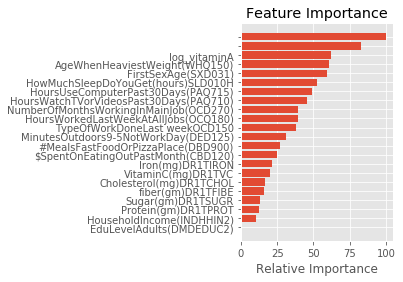

In [178]:
#gradient boosting feature importance
rgr.fit(data_train, target_train)
feature_importance = rgr.feature_importances_

# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, subset_list)
plt.xlabel('Relative Importance')
plt.title('Feature Importance')
plt.show()


In [42]:
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error


In [188]:
# compute test set deviance
#(n_estimators=100, loss ='ls', learning_rate=0.1, max_depth=3, min_samples_split=3, random_state = 1)

params = {'n_estimators': 100, 'max_depth': 3, 'min_samples_split': 3,
          'learning_rate': 0.1, 'loss': 'ls'}
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(rgr.staged_decision_function(train_test)):
    test_score[i] = rgr.loss_(target_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, rgr.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

AttributeError: 'GradientBoostingRegressor' object has no attribute 'staged_decision_function'

In [114]:
features

['EduLevelAdults(DMDEDUC2)',
 'HouseholdIncome(INDHHIN2)',
 'Protein(gm)DR1TPROT',
 'Sugar(gm)DR1TSUGR',
 'fiber(gm)DR1TFIBE',
 'Cholesterol(mg)DR1TCHOL',
 'VitaminC(mg)DR1TVC',
 'Iron(mg)DR1TIRON',
 '$SpentOnEatingOutPastMonth(CBD120)',
 '#MealsFastFoodOrPizzaPlace(DBD900)',
 'MinutesOutdoors9-5NotWorkDay(DED125)',
 'FamilyMonthlyPovertyLevelIndex(INDFMMPI)',
 'TotalSavings/CashAssetsForFam(IND247)',
 'TypeOfWorkDoneLast weekOCD150',
 'HoursWorkedLastWeekAtAllJobs(OCQ180)',
 'NumberOfMonthsWorkingInMainJob(OCD270)',
 'HoursWatchTVorVideosPast30Days(PAQ710)',
 'HoursUseComputerPast30Days(PAQ715)',
 'HowMuchSleepDoYouGet(hours)SLD010H',
 'FirstSexAge(SXD031)',
 'AgeWhenHeaviestWeight(WHQ150)',
 'log_vitaminA']

In [119]:
# Gradient Boosting fearure selection 

from sklearn.ensemble import GradientBoostingRegressor

rgr = GradientBoostingRegressor(n_estimators=100, max_features=.33, 
                            max_depth=None, min_samples_split=3,
                            criterion='mse', random_state=1)
sel = SelectFromModel(rgr, prefit=False, threshold='mean', 
                      max_features=None)
print ('Gradient Boosting Wrapper Select: ')

fitGB_mod=sel.fit(data_np, target_np)
selGB_idx=fitGB_mod.get_support() 

#Get lists of selected and non-selected features (names and indexes)
tempGB=[]
tempGB_idx=[]
tempGB_del=[]
for i in range(len(data_np[0])):
    if selGB_idx[i]==1: 
        tempGB.append(header_new[i+1])
        tempGB_idx.append(i)
    else:
        tempGB_del.append(i)
print('Selected:', tempGB)
print('Features (total/selected):', len(data_np[0]), len(tempGB))
print('\n')


Gradient Boosting Wrapper Select: 
Selected: ['AGE', 'HouseholdIncome(INDHHIN2)', 'Energy(kcal)DR1TKCAL', 'Protein(gm)DR1TPROT', 'Carbs(gm)DR1TCARB', 'Sugar(gm)DR1TSUGR', 'fiber(gm)DR1TFIBE', ' TotalFat(gm)DR1TTFAT', 'Cholesterol(mg)DR1TCHOL', 'VitaminE(mg)DR1TATOC', 'VitaminC(mg)DR1TVC', 'VitaminD(D2 + D3)(mcg)DR1TVD', ' Calcium(mg)DR1TCALC', 'Iron(mg)DR1TIRON', 'Sodium(mg)DR1TSODI', 'Caffeine(mg)DR1TCAFF', 'TotalCholesterol( mmol/L)LBDTCSI', '$spentAtSupermarket/grocery store(CBD070)', '$SpentOnEatingOutPastMonth(CBD120)', '#MealsFastFoodOrPizzaPlace(DBD900)', 'FamilyMonthlyPovertyLevelIndex(INDFMMPI)', 'TypeOfWorkDoneLast weekOCD150', 'HoursWorkedLastWeekAtAllJobs(OCQ180)', 'NumberOfMonthsWorkingInMainJob(OCD270)', 'DurationOfLongestJob(months)OCD395', 'HowMuchSleepDoYouGet(hours)SLD010H', 'FirstSexAge(SXD031)', 'CurrentSelfReportedWeight(pounds)WHD020', 'AgeWhenHeaviestWeight(WHQ150)', 'log_vitaminA']
Features (total/selected): 60 30




In [124]:
# Nueral networks Regressor
from sklearn.neural_network import MLPRegressor, MLPClassifier 
data_train, data_test, target_train, target_test = train_test_split(data_np, target_np, test_size=0.35)

start_ts=time.time()
rgr=MLPRegressor(hidden_layer_sizes=10, activation='logistic', solver='lbfgs', 
                 alpha=0.0001, max_iter= 500, random_state = 1)
scores=cross_validate(rgr, data_np, target_np, scoring=scorers, cv=5)                                                                                                  

scores_RMSE = np.asarray([math.sqrt(-x) for x in scores['test_Neg_MSE']])    #Turns negative MSE scores into RMSE
scores_Expl_Var = scores['test_expl_var']
print("Neural Network RMSE:: %0.2f (+/- %0.2f)" % ((scores_RMSE.mean()), (scores_RMSE.std() * 2)))
print("Neural Network Expl Var: %0.2f (+/- %0.2f)" % ((scores_Expl_Var.mean()), (scores_Expl_Var.std() * 2)))
print("CV Runtime:", time.time()-start_ts)

Neural Network RMSE:: 4.22 (+/- 0.15)
Neural Network Expl Var: 0.02 (+/- 0.03)
CV Runtime: 4.1404359340667725


In [150]:
# SVR with subset of 20
from sklearn.svm import SVR
data_train, data_test, target_train, target_test = train_test_split(sub_np, np_target, test_size=0.35)

scorers = {'Neg_MSE': 'neg_mean_squared_error', 'expl_var': 'explained_variance'} 

start_ts=time.time()
rgr=SVR(C =1.0, gamma = 0.1, kernel = 'rbf')
scores= cross_validate(rgr, sub_np, target_np, scoring=scorers, cv=5)                                                                                             

scores_RMSE = np.asarray([math.sqrt(-x) for x in scores['test_Neg_MSE']])                                       #Turns negative MSE scores into RMSE
scores_Expl_Var = scores['test_expl_var']
print("SVM RMSE:: %0.2f (+/- %0.2f)" % ((scores_RMSE.mean()), (scores_RMSE.std() * 2)))
print("SVM Expl Var: %0.2f (+/- %0.2f)" % ((scores_Expl_Var.mean()), (scores_Expl_Var.std() * 2)))
print("CV Runtime:", time.time()-start_ts)


NameError: name 'np_target' is not defined

In [43]:
from sklearn.preprocessing import KBinsDiscretizer, scale

#Discretize Target variable with KBinsDiscretizer
enc = KBinsDiscretizer(n_bins=[2], encode='ordinal', strategy='kmeans') 
target_np_bin = enc.fit_transform(target_np.reshape(-1,1))

#Get Bin min/max
temp=[[] for x in range(2+1)]
for i in range(len(target_np)):
    
    for j in range(3):
        
        if target_np_bin[i]==j:
            
            temp[j].append(target_np[i])

    for j in range(2):
        print('Bin', j, ':', min(temp[j]), max(temp[j]), len(temp[j]))
    print('\n')


Bin 0 : 1 1 1


ValueError: min() arg is an empty sequence

In [13]:
 #Convert Target array back to correct shape
    target_np=np.ravel(target_np_bin)

IndentationError: unexpected indent (<ipython-input-13-9ebed1a7a132>, line 2)

In [55]:
# genetic search 

inputs = data_np
num_weights = 6065

sol_per_pop = 60 

#population size 
pop_size = (sol_per_pop, num_weights)

##Creating the initial population.


import ga
num_generations = 20

num_parents_mating = 18

for generation in range(num_generations):
    fitness = ga.cal_pop_fitness(inputs)
    parents = ga.select_mating_pool(inputs, fitness, num_parents_mating)
    
    ## Generating next generation using crossover
    offspring_crossover = ga.crossover(parents, 
                                       offspring_size=(pop_size[0]-parents.shape[0],
                                                       num_weights))

    # Adding some variations to the offsrping using mutation.
    offspring_mutation = ga.mutation(offspring_crossover)
    
# Creating the new population based on the parents and offspring.
new_population[0:parents.shape[0], :] = parents
new_population[parents.shape[0]:, :] = offspring_mutation

    

AttributeError: module 'ga' has no attribute 'cal_pop_fitness'

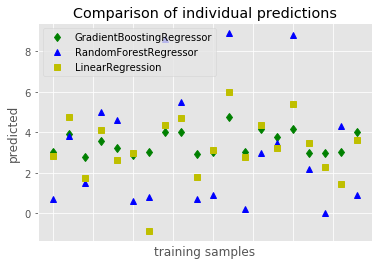

In [107]:
from sklearn.linear_model import LinearRegression
reg1 = GradientBoostingRegressor(random_state=1, n_estimators=10)
reg2 = RandomForestRegressor(random_state=1, n_estimators=10)
reg3 = LinearRegression()
reg1.fit(data_train, target_train)
reg2.fit(data_train, target_train)
reg3.fit(data_train, target_train)


xt = data_train[:20]
plt.figure()
plt.plot(reg1.predict(xt), 'gd', label='GradientBoostingRegressor')
plt.plot(reg2.predict(xt), 'b^', label='RandomForestRegressor')
plt.plot(reg3.predict(xt), 'ys', label='LinearRegression')
plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Comparison of individual predictions')
plt.show()

In [142]:
linreg = LinearRegression()
linreg.fit(data_train,target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [158]:
sub_array

array(['EduLevelAdults(DMDEDUC2)', 'HouseholdIncome(INDHHIN2)',
       'Protein(gm)DR1TPROT', 'Sugar(gm)DR1TSUGR', 'fiber(gm)DR1TFIBE',
       'Cholesterol(mg)DR1TCHOL', 'VitaminC(mg)DR1TVC',
       'Iron(mg)DR1TIRON', '$SpentOnEatingOutPastMonth(CBD120)',
       '#MealsFastFoodOrPizzaPlace(DBD900)',
       'MinutesOutdoors9-5NotWorkDay(DED125)',
       'FamilyMonthlyPovertyLevelIndex(INDFMMPI)',
       'TotalSavings/CashAssetsForFam(IND247)',
       'TypeOfWorkDoneLast weekOCD150',
       'HoursWorkedLastWeekAtAllJobs(OCQ180)',
       'NumberOfMonthsWorkingInMainJob(OCD270)',
       'HoursWatchTVorVideosPast30Days(PAQ710)',
       'HoursUseComputerPast30Days(PAQ715)',
       'HowMuchSleepDoYouGet(hours)SLD010H', 'FirstSexAge(SXD031)',
       'AgeWhenHeaviestWeight(WHQ150)', 'log_vitaminA'], dtype='<U40')

In [48]:
%matplotlib inline
def plot_coefficients(linreg, n_features, sub_array):
    plt.barh(range(len(subset)), linreg.coef_[:-1], align='center')
    plt.yticks(np.arange(len(subset_list)), sub_array)
    plt.xlabel("Coefficient Value")
    plt.ylabel("Feature")
    plt.ylim(-1, 20)

#plot_coefficients(linreg, len(subset_list), sub_array)

In [49]:
data.shape

(6065, 61)

In [132]:
class_header = list(data.columns.values)
#class_header

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6065 entries, 0 to 6064
Data columns (total 61 columns):
DepressionScore                                   6065 non-null int64
AGE                                               6065 non-null int64
US_Army)DMQMILIZ                                  6065 non-null int64
BornInUS                                          6065 non-null int64
Citizenship(DMDCITZN)                             6065 non-null int64
EduLevelAdults(DMDEDUC2)                          6065 non-null int64
MaritalStatus(DMDMARTL)                           6065 non-null int64
(Eng/Span(SIALANG)                                6065 non-null int64
#PPLinHousehold(DMDHHSIZ)                         6065 non-null int64
#Kinds<=5yrs(DMDHHSZA)                            6065 non-null int64
#ofKinds6-17yrs(DMDHHSZB)                         6065 non-null int64
#ofAdults>=60yrs(DMDHHSZE)                        6065 non-null int64
HouseholdIncome(INDHHIN2)                         606

In [55]:
no_depression = np.asarray(data.DepressionScore)

In [60]:
age_np = np.asarray(data.AGE)

Text(0, 0.5, 'Polulation Size')

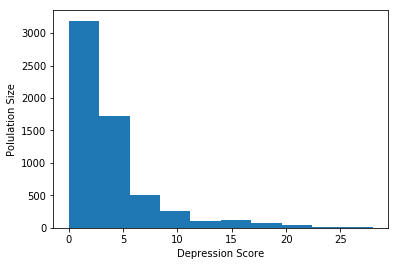

In [146]:
plt.hist(no_depression)
plt.xlabel("Depression Score")
plt.ylabel("Polulation Size")

In [66]:
data.DepressionScore.value_counts()

0     1713
5      906
1      848
2      630
3      467
4      357
6      214
7      163
8      135
9      105
10      92
11      66
14      57
12      54
13      51
16      38
15      31
17      28
18      26
19      19
20      17
21      12
22      12
24       8
25       6
23       4
27       4
28       2
Name: DepressionScore, dtype: int64

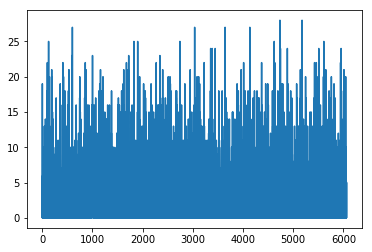

In [59]:
plt.plot(no_depression)

In [73]:
#no_depression = data['DepressionScore' == 0]
happy = data.loc[(data['DepressionScore'] == 0) & data.loc[data['DepressionScore'] >15 & <27]

SyntaxError: invalid syntax (<ipython-input-73-4a7136402f06>, line 2)

In [91]:
happy = data[(data['DepressionScore'] >= 15 & data['DepressionScore'] <= 27 & data['DepressionScore'] == 0)]
happy.shape

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [90]:
test = data[data['DepressionScore'] == 0]
test.shape

(1713, 61)

In [103]:
test2 = data[(data['DepressionScore'] >= 15) & (data['DepressionScore'] <= 27)]
#so[(so['score'] >= 5) & (so['ans_name'] == 'Scott Boston')]
test2.shape

(205, 61)

In [104]:
class_subset = test.append(test2, sort=False)
class_subset.DepressionScore.value_counts()

0     1713
16      38
15      31
17      28
18      26
19      19
20      17
22      12
21      12
24       8
25       6
27       4
23       4
Name: DepressionScore, dtype: int64

In [107]:
class_subset.head()

,DepressionScore,AGE,US_Army)DMQMILIZ,BornInUS,Citizenship(DMDCITZN),EduLevelAdults(DMDEDUC2),MaritalStatus(DMDMARTL),(Eng/Span(SIALANG),#PPLinHousehold(DMDHHSIZ),#Kinds<=5yrs(DMDHHSZA),...,HowOftenDrankMilk,Race(RIDRETH3)_Asian,Race(RIDRETH3)_Black,Race(RIDRETH3)_MexicanAmerican,Race(RIDRETH3)_Other&MultiRacial,Race(RIDRETH3)_OtherHispanic,Race(RIDRETH3)_White,log_vitaminA,female,male
2,0,72,1,1,1,4,1,1,2,0,...,9,0,0,0,0,0,1,6.48,0,1
8,0,26,0,1,1,5,0,1,3,0,...,9,0,0,0,0,0,1,7.26,1,0
12,0,18,0,1,1,3,0,1,7,0,...,8,0,0,1,0,0,0,4.53,0,1
14,0,50,0,0,0,5,1,1,3,0,...,7,1,0,0,0,0,0,6.31,0,1
16,0,28,1,0,1,4,1,1,2,0,...,6,1,0,0,0,0,0,8.75,0,1


In [114]:
classify_replaced = class_subset.replace({'DepressionScore': {15: 1, 16: 1, 17: 1, 18: 1,
                                                             19:1, 20: 1, 21: 1, 22: 1, 23: 1,
                                                             24: 1, 25: 1, 27: 1}})

In [141]:
#classify_replaced
classify_replaced.to_csv('classify.csv', sep = ',', encoding = 'utf-8')

In [117]:
to_class = classify_replaced.iloc[:,1:]
to_class.head()

,AGE,US_Army)DMQMILIZ,BornInUS,Citizenship(DMDCITZN),EduLevelAdults(DMDEDUC2),MaritalStatus(DMDMARTL),(Eng/Span(SIALANG),#PPLinHousehold(DMDHHSIZ),#Kinds<=5yrs(DMDHHSZA),#ofKinds6-17yrs(DMDHHSZB),...,HowOftenDrankMilk,Race(RIDRETH3)_Asian,Race(RIDRETH3)_Black,Race(RIDRETH3)_MexicanAmerican,Race(RIDRETH3)_Other&MultiRacial,Race(RIDRETH3)_OtherHispanic,Race(RIDRETH3)_White,log_vitaminA,female,male
2,72,1,1,1,4,1,1,2,0,0,...,9,0,0,0,0,0,1,6.48,0,1
8,26,0,1,1,5,0,1,3,0,0,...,9,0,0,0,0,0,1,7.26,1,0
12,18,0,1,1,3,0,1,7,0,2,...,8,0,0,1,0,0,0,4.53,0,1
14,50,0,0,0,5,1,1,3,0,1,...,7,1,0,0,0,0,0,6.31,0,1
16,28,1,0,1,4,1,1,2,0,0,...,6,1,0,0,0,0,0,8.75,0,1


In [121]:
target_class = classify_replaced['DepressionScore']
target_class.head()

2     0
8     0
12    0
14    0
16    0
Name: DepressionScore, dtype: int64

In [123]:
class_np = np.asarray(to_class)

In [124]:
target_np = np.asarray(target_class)

In [125]:
target_np

array([0, 0, 0, ..., 1, 1, 1])

In [126]:
class_np.shape

(1918, 60)

In [127]:
target_class.shape

(1918,)

In [142]:
#random forest classifier feature selection

class_train, class_test, class_target_train, class_target_test = train_test_split(class_np, target_class, test_size=0.35)

clf= RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth= None, min_samples_split=3, random_state=rand_st)
clf.fit(class_np, target_class)
sel_idx = []
feature_importance = clf.feature_importances_
for x in feature_importance:
    if x >= np.mean(feature_importance):
        sel_idx.append(1)
    else:
        sel_idx.append(0)
temp=[]
temp_idx=[]
temp_del=[]
for i in range(len(class_np[0])):
    if sel_idx[i]==1:                                   #Selected Features get added to temp header
        temp.append(class_header[i+1])
        temp_idx.append(i)
    else:                                                #Indexes of non-selected features get added to delete array
        temp_del.append(i)
print('Selected:', temp)
print('Features (total/selected):', len(class_np[0]), len(temp))
print('\n')  

#Filter selected columns from original dataset 
header = class_header[0:1]
for field in temp:
    header.append(field)
new_np = np.delete(class_np, temp_del, axis=1) 
        

Selected: ['AGE', 'HouseholdIncome(INDHHIN2)', 'Energy(kcal)DR1TKCAL', 'Protein(gm)DR1TPROT', 'Carbs(gm)DR1TCARB', 'Sugar(gm)DR1TSUGR', 'fiber(gm)DR1TFIBE', ' TotalFat(gm)DR1TTFAT', 'Cholesterol(mg)DR1TCHOL', 'VitaminE(mg)DR1TATOC', 'VitaminC(mg)DR1TVC', 'VitaminD(D2 + D3)(mcg)DR1TVD', ' Calcium(mg)DR1TCALC', 'Iron(mg)DR1TIRON', 'Sodium(mg)DR1TSODI', 'Caffeine(mg)DR1TCAFF', 'TotalCholesterol( mmol/L)LBDTCSI', '$spentAtSupermarket/grocery store(CBD070)', '$SpentOnEatingOutPastMonth(CBD120)', 'FamilyMonthlyPovertyLevelIndex(INDFMMPI)', 'TypeOfWorkDoneLast weekOCD150', 'HoursWorkedLastWeekAtAllJobs(OCQ180)', 'NumberOfMonthsWorkingInMainJob(OCD270)', 'DurationOfLongestJob(months)OCD395', 'HoursWatchTVorVideosPast30Days(PAQ710)', 'HowMuchSleepDoYouGet(hours)SLD010H', 'FirstSexAge(SXD031)', 'CurrentSelfReportedWeight(pounds)WHD020', 'AgeWhenHeaviestWeight(WHQ150)', 'log_vitaminA']
Features (total/selected): 60 30




In [139]:
new_np.shape

(1918, 30)

In [ ]:
#Recursive Function for searching thru feature space
def feat_space_search(arr, curr_idx):
    '''Setup currently as exhuastive search, but could be changed to use
       greedy search, random search, genetic algorithms, etc. ... also
       no regularization, so probably selects more features than necessary'''
    global roll_idx, combo_ctr, best_score, sel_idx
    
    if curr_idx==feat_cnt:
        #If end of feature array, roll thru combinations
        roll_idx=roll_idx+1
        print ("Combos Searched so far:", combo_ctr, "Current Best Score:", best_score)
        for i in range(roll_idx, len(arr)):
            arr[i]=0
        if roll_idx<feat_cnt-1:
            feat_space_search(arr, roll_idx+1)                                                                      #Recurse till end of rolls
        
    else:
        #Else setup next feature combination and calc performance
        arr[curr_idx]=1
        data=new_np#_wrap                                                                                          #Temp array to hold data
        temp_del=[i for i in range(len(arr)) if arr[i]==0]                                                          #Pick out features not in this combo, and remove
        data = np.delete(data, temp_del, axis=1)
        data_train, data_test, target_train, target_test = train_test_split(new_np, target_class, test_size=0.35)                
           
        scorers = {'Neg_MSE': 'neg_mean_squared_error', 'expl_var': 'explained_variance'}
        scores = cross_validate(rgr, data, target_class, scoring=scorers, cv=5)    
        score = np.asarray([math.sqrt(-x) for x in scores['test_Neg_MSE']]).mean()                              #RMSE
        print('Random Forest RMSE:', curr_idx, feat_arr, len(data[0]), score)
        if score<best_score:                                                     #Compare performance and update sel_idx and best_score, if needed
            best_score=score
            sel_idx=copy.deepcopy(arr) 

        #move to next feature index and recurse
    combo_ctr+=1  
    curr_idx+=1
    feat_space_search(arr, curr_idx)                                             #Recurse till end of iteration for roll

#full blown wrapper:
start_ts = time.time()
sel_fullblown_idx = []
best_score = sys.float_info.max
feat_cnt = len(new_np[0])

#create wrapper model


clf=GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, loss='deviance', max_depth=3,  min_samples_split=3, random_state=rand_st)

#loop thru feature sets
roll_idx = 0
combo_ctr = 0   
feat_arr = [0 for col in range(feat_cnt)] #initialize feature array
for idx in range(feat_cnt):
    roll_idx=idx
    feat_space_search(feat_arr, idx) #recurse
    feat_arr=[0 for col in range(feat_cnt)] #reset feature array after each interation
    
print('# of feature combo tested:', combo_ctr)
print(best_score, sel_fullblown_idx, len(new_np[0]))
print("Wrapper feat sel runtime:", time.time()-start_ts)

#Get lists of selected and non-selected features (names and indexes)
temp=[]
temp_idx=[]
temp_del=[]
for i in range(len(sub_np[0])):
    if sel_idx[i]==1: 
        temp.append(header_new[i+1])
        temp_idx.append(i)
    else:
        temp_del.append(i)
print('Selected:', temp)
print('Features (total/selected):', len(sub_np[0]), len(temp))
print('\n') 